In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tt = sns.load_dataset("titanic")
tt.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [52]:
del tt["alive"]
del tt["class"]

tt


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,C,Cherbourg,True


In [53]:
tt['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [54]:
tt.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [55]:
# filling null values in age
tt['age'] = tt['age'].fillna(tt['age'].mode()[0])
# filling null values in embarked
tt['embarked'] = tt['embarked'].fillna(tt['embarked'].mode()[0])
# 
tt['embark_town'] = tt['embark_town'].fillna(tt['embark_town'].mode()[0])
# 
tt['deck'] = tt['deck'].fillna(tt['deck'].mode()[0])

tt



,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,C,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,C,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,C,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,C,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,B,Southampton,True
888,0,3,female,24.0,1,2,23.4500,S,woman,False,C,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,C,Cherbourg,True


In [56]:
tt.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
who            0
adult_male     0
deck           0
embark_town    0
alone          0
dtype: int64

In [57]:
tt['family_size'] = tt['sibsp'] + tt['parch'] + 1

del tt['sibsp']
del tt['parch']

tt

,survived,pclass,sex,age,fare,embarked,who,adult_male,deck,embark_town,alone,family_size
0,0,3,male,22.0,7.2500,S,man,True,C,Southampton,False,2
1,1,1,female,38.0,71.2833,C,woman,False,C,Cherbourg,False,2
2,1,3,female,26.0,7.9250,S,woman,False,C,Southampton,True,1
3,1,1,female,35.0,53.1000,S,woman,False,C,Southampton,False,2
4,0,3,male,35.0,8.0500,S,man,True,C,Southampton,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,man,True,C,Southampton,True,1
887,1,1,female,19.0,30.0000,S,woman,False,B,Southampton,True,1
888,0,3,female,24.0,23.4500,S,woman,False,C,Southampton,False,4
889,1,1,male,26.0,30.0000,C,man,True,C,Cherbourg,True,1


<Axes: ylabel='count'>

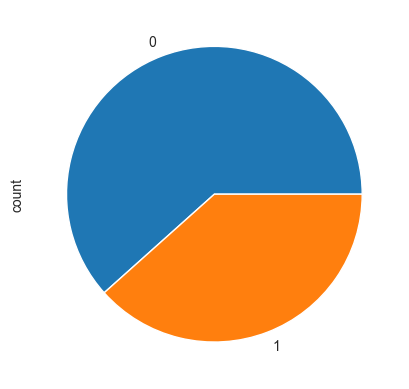

In [58]:
tt['survived'].value_counts().plot(kind='pie')

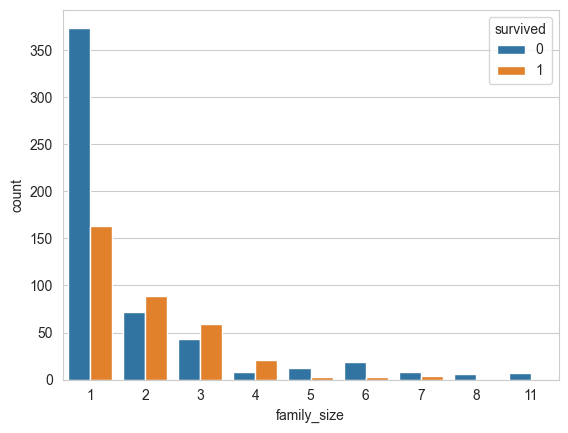

In [59]:

sns.countplot(x ='family_size', hue='survived', data= tt)
plt.show()

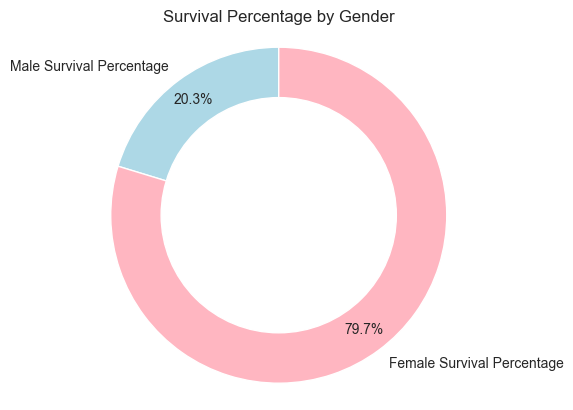

In [60]:
male_survival_percentage = (tt[(tt['sex'] == 'male') & (tt['survived'] == 1)].shape[0] / len(tt[tt['sex'] == 'male'])) * 100
female_survival_percentage = (tt[(tt['sex'] == 'female') & (tt['survived'] == 1)].shape[0] / len(tt[tt['sex'] == 'female'])) * 100

labels = ['Male Survival Percentage', 'Female Survival Percentage']
sizes = [male_survival_percentage, female_survival_percentage]
colors = ['lightblue', 'lightpink'] 

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Survival Percentage by Gender')
plt.show()

In [61]:
enco_sex = pd.get_dummies(tt['sex'], prefix= 'sex')
tt = pd.concat([tt, enco_sex],axis=1)
tt.drop('sex', axis=1, inplace=True)

tt

,survived,pclass,age,fare,embarked,who,adult_male,deck,embark_town,alone,family_size,sex_female,sex_male
0,0,3,22.0,7.2500,S,man,True,C,Southampton,False,2,False,True
1,1,1,38.0,71.2833,C,woman,False,C,Cherbourg,False,2,True,False
2,1,3,26.0,7.9250,S,woman,False,C,Southampton,True,1,True,False
3,1,1,35.0,53.1000,S,woman,False,C,Southampton,False,2,True,False
4,0,3,35.0,8.0500,S,man,True,C,Southampton,True,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,S,man,True,C,Southampton,True,1,False,True
887,1,1,19.0,30.0000,S,woman,False,B,Southampton,True,1,True,False
888,0,3,24.0,23.4500,S,woman,False,C,Southampton,False,4,True,False
889,1,1,26.0,30.0000,C,man,True,C,Cherbourg,True,1,False,True


In [62]:
enco_embark = pd.get_dummies(tt['embarked'], prefix= 'embarked')
tt = pd.concat([tt, enco_embark],axis=1)
tt.drop('embarked', axis=1, inplace=True)

tt

,survived,pclass,age,fare,who,adult_male,deck,embark_town,alone,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,7.2500,man,True,C,Southampton,False,2,False,True,False,False,True
1,1,1,38.0,71.2833,woman,False,C,Cherbourg,False,2,True,False,True,False,False
2,1,3,26.0,7.9250,woman,False,C,Southampton,True,1,True,False,False,False,True
3,1,1,35.0,53.1000,woman,False,C,Southampton,False,2,True,False,False,False,True
4,0,3,35.0,8.0500,man,True,C,Southampton,True,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,man,True,C,Southampton,True,1,False,True,False,False,True
887,1,1,19.0,30.0000,woman,False,B,Southampton,True,1,True,False,False,False,True
888,0,3,24.0,23.4500,woman,False,C,Southampton,False,4,True,False,False,False,True
889,1,1,26.0,30.0000,man,True,C,Cherbourg,True,1,False,True,True,False,False


In [63]:
enco_who = pd.get_dummies(tt['who'], prefix= 'who')
tt = pd.concat([tt, enco_who],axis=1)
tt.drop('who', axis=1, inplace=True)

tt

,survived,pclass,age,fare,adult_male,deck,embark_town,alone,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,7.2500,True,C,Southampton,False,2,False,True,False,False,True,False,True,False
1,1,1,38.0,71.2833,False,C,Cherbourg,False,2,True,False,True,False,False,False,False,True
2,1,3,26.0,7.9250,False,C,Southampton,True,1,True,False,False,False,True,False,False,True
3,1,1,35.0,53.1000,False,C,Southampton,False,2,True,False,False,False,True,False,False,True
4,0,3,35.0,8.0500,True,C,Southampton,True,1,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,True,C,Southampton,True,1,False,True,False,False,True,False,True,False
887,1,1,19.0,30.0000,False,B,Southampton,True,1,True,False,False,False,True,False,False,True
888,0,3,24.0,23.4500,False,C,Southampton,False,4,True,False,False,False,True,False,False,True
889,1,1,26.0,30.0000,True,C,Cherbourg,True,1,False,True,True,False,False,False,True,False


In [64]:
enco_deck = pd.get_dummies(tt['deck'], prefix= 'deck')
tt = pd.concat([tt, enco_deck],axis=1)
tt.drop('deck', axis=1, inplace=True)

tt

,survived,pclass,age,fare,adult_male,embark_town,alone,family_size,sex_female,sex_male,...,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,22.0,7.2500,True,Southampton,False,2,False,True,...,False,True,False,False,False,True,False,False,False,False
1,1,1,38.0,71.2833,False,Cherbourg,False,2,True,False,...,False,False,True,False,False,True,False,False,False,False
2,1,3,26.0,7.9250,False,Southampton,True,1,True,False,...,False,False,True,False,False,True,False,False,False,False
3,1,1,35.0,53.1000,False,Southampton,False,2,True,False,...,False,False,True,False,False,True,False,False,False,False
4,0,3,35.0,8.0500,True,Southampton,True,1,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,True,Southampton,True,1,False,True,...,False,True,False,False,False,True,False,False,False,False
887,1,1,19.0,30.0000,False,Southampton,True,1,True,False,...,False,False,True,False,True,False,False,False,False,False
888,0,3,24.0,23.4500,False,Southampton,False,4,True,False,...,False,False,True,False,False,True,False,False,False,False
889,1,1,26.0,30.0000,True,Cherbourg,True,1,False,True,...,False,True,False,False,False,True,False,False,False,False


In [65]:
enco_embark_town = pd.get_dummies(tt['embark_town'], prefix= 'embark_town')
tt = pd.concat([tt, enco_embark_town],axis=1)
tt.drop('embark_town', axis=1, inplace=True)

tt

,survived,pclass,age,fare,adult_male,alone,family_size,sex_female,sex_male,embarked_C,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,7.2500,True,False,2,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1,1,1,38.0,71.2833,False,False,2,True,False,True,...,False,False,True,False,False,False,False,True,False,False
2,1,3,26.0,7.9250,False,True,1,True,False,False,...,False,False,True,False,False,False,False,False,False,True
3,1,1,35.0,53.1000,False,False,2,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,3,35.0,8.0500,True,True,1,False,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,True,True,1,False,True,False,...,False,False,True,False,False,False,False,False,False,True
887,1,1,19.0,30.0000,False,True,1,True,False,False,...,False,True,False,False,False,False,False,False,False,True
888,0,3,24.0,23.4500,False,False,4,True,False,False,...,False,False,True,False,False,False,False,False,False,True
889,1,1,26.0,30.0000,True,True,1,False,True,True,...,False,False,True,False,False,False,False,True,False,False


In [66]:
tt[tt.columns] = tt[tt.columns].astype(float)

tt

,survived,pclass,age,fare,adult_male,alone,family_size,sex_female,sex_male,embarked_C,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,3.0,22.0,7.2500,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,0.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,13.0000,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,1.0,19.0,30.0000,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,3.0,24.0,23.4500,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1.0,1.0,26.0,30.0000,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
tt.corr()

,survived,pclass,age,fare,adult_male,alone,family_size,sex_female,sex_male,embarked_C,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
survived,1.000000,-0.338481,-0.052872,0.257307,-0.557080,-0.203367,0.016639,0.543351,-0.543351,0.168240,...,0.022287,0.175095,-0.286690,0.150716,0.145321,0.057935,0.016040,0.168240,0.003650,-0.149683
pclass,-0.338481,1.000000,-0.356187,-0.549500,0.094035,0.135207,0.065997,-0.131900,0.131900,-0.243292,...,-0.204934,-0.369572,0.541655,-0.278690,-0.230091,0.011063,0.055561,-0.243292,0.221009,0.074053
age,-0.052872,-0.356187,1.000000,0.107554,0.232281,0.151002,-0.236339,-0.073377,0.073377,0.025811,...,0.120020,0.105940,-0.206475,0.142034,0.126809,-0.073698,-0.070334,0.025811,-0.071806,0.022577
fare,0.257307,-0.549500,0.107554,1.000000,-0.182024,-0.271832,0.217138,0.182333,-0.182333,0.269335,...,0.019549,0.386297,-0.303948,0.098878,0.053717,-0.033093,-0.025180,0.269335,-0.117216,-0.162184
adult_male,-0.557080,0.094035,0.232281,-0.182024,1.000000,0.404744,-0.348143,-0.908578,0.908578,-0.065980,...,0.070590,-0.095696,0.117064,-0.059374,-0.040505,-0.054228,-0.082709,-0.065980,-0.076789,0.106125
alone,-0.203367,0.135207,0.151002,-0.271832,0.404744,1.000000,-0.690922,-0.303646,0.303646,-0.095298,...,0.052762,-0.064914,0.098372,-0.083664,-0.028179,-0.015972,-0.082709,-0.095298,0.086464,0.029074
family_size,0.016639,0.065997,-0.236339,0.217138,-0.348143,-0.690922,1.000000,0.200988,-0.200988,-0.046215,...,-0.051767,0.004620,0.032640,-0.021566,-0.033466,0.013003,0.035206,-0.046215,-0.058592,0.077359
sex_female,0.543351,-0.131900,-0.073377,0.182333,-0.908578,-0.303646,0.200988,1.000000,-1.000000,0.082853,...,-0.078271,0.109689,-0.122877,0.079248,0.047003,0.008202,0.091031,0.082853,0.074115,-0.119224
sex_male,-0.543351,0.131900,0.073377,-0.182333,0.908578,0.303646,-0.200988,-1.000000,1.000000,-0.082853,...,0.078271,-0.109689,0.122877,-0.079248,-0.047003,-0.008202,-0.091031,-0.082853,-0.074115,0.119224
embarked_C,0.168240,-0.243292,0.025811,0.269335,-0.065980,-0.095298,-0.046215,0.082853,-0.082853,1.000000,...,0.093040,0.168642,-0.162513,0.102977,-0.015939,-0.034726,-0.032371,1.000000,-0.148258,-0.782742


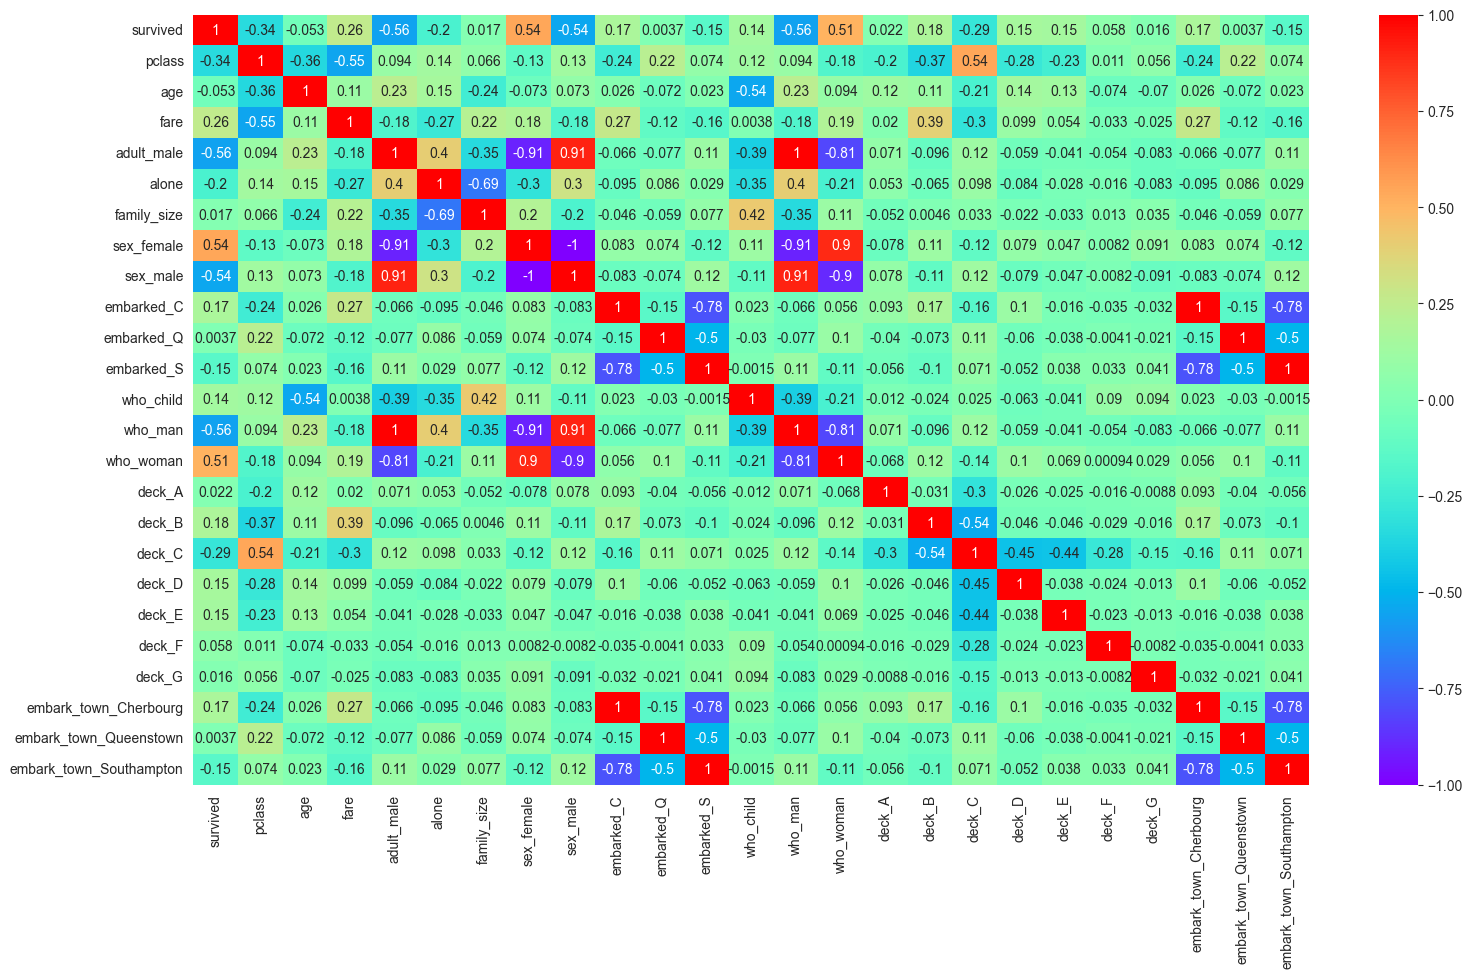

In [68]:
plt.figure(figsize=(18, 10))  

sns.heatmap(tt.corr(), annot=True, cmap='rainbow')
plt.show()

In [69]:
corr_matrix = tt.corr().abs()

threshold = 0.8

# Get column and index names where correlation is strong
col_names = corr_matrix.columns.tolist()
index_names = corr_matrix.index.tolist()

# Find strongly correlated pairs (excluding self-correlations)
strong_pairs = []
for i in range(len(col_names)):
    for j in range(i + 1, len(col_names)):  # Avoid redundant comparisons
        if corr_matrix.iloc[i, j] > threshold:
            strong_pairs.append((col_names[i], col_names[j]))
            
print("Strongly correlated pairs (above threshold", threshold, "):")

for pair in strong_pairs:
    print(pair)

Strongly correlated pairs (above threshold 0.8 ):
('adult_male', 'sex_female')
('adult_male', 'sex_male')
('adult_male', 'who_man')
('adult_male', 'who_woman')
('sex_female', 'sex_male')
('sex_female', 'who_man')
('sex_female', 'who_woman')
('sex_male', 'who_man')
('sex_male', 'who_woman')
('embarked_C', 'embark_town_Cherbourg')
('embarked_Q', 'embark_town_Queenstown')
('embarked_S', 'embark_town_Southampton')
('who_man', 'who_woman')


In [70]:
tt = tt.drop(columns= list(set([pair[1] for pair in strong_pairs])))



In [71]:
tt

,survived,pclass,age,fare,adult_male,alone,family_size,embarked_C,embarked_Q,embarked_S,who_child,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,3.0,22.0,7.2500,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,38.0,71.2833,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,35.0,53.1000,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,3.0,35.0,8.0500,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,13.0000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,1.0,1.0,19.0,30.0000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,0.0,3.0,24.0,23.4500,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1.0,1.0,26.0,30.0000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [72]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
tt[tt.columns[1:]] = sc.fit_transform(tt[tt.columns[1:]])



In [73]:
tt

,survived,pclass,age,fare,adult_male,alone,family_size,embarked_C,embarked_Q,embarked_S,who_child,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,1.0,0.271174,0.014151,1.0,0.0,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.472229,0.139136,0.0,0.0,0.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.015469,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.434531,0.103644,0.0,0.0,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.434531,0.015713,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.025374,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.233476,0.058556,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,0.0,1.0,0.296306,0.045771,0.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1.0,0.0,0.321438,0.058556,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [74]:
from sklearn.model_selection import train_test_split

X = tt.drop('survived', axis=1)
y = tt['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

model_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    model_accuracies[name] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

    print(f'{name}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}')
    

Logistic Regression: Train Accuracy = 0.8371, Test Accuracy = 0.8101
Decision Tree: Train Accuracy = 0.9831, Test Accuracy = 0.7877
Random Forest: Train Accuracy = 0.9831, Test Accuracy = 0.7989
SVM: Train Accuracy = 0.8371, Test Accuracy = 0.7933
KNN: Train Accuracy = 0.8722, Test Accuracy = 0.7989
Naive Bayes: Train Accuracy = 0.7402, Test Accuracy = 0.7430
XGBoost: Train Accuracy = 0.9691, Test Accuracy = 0.7989


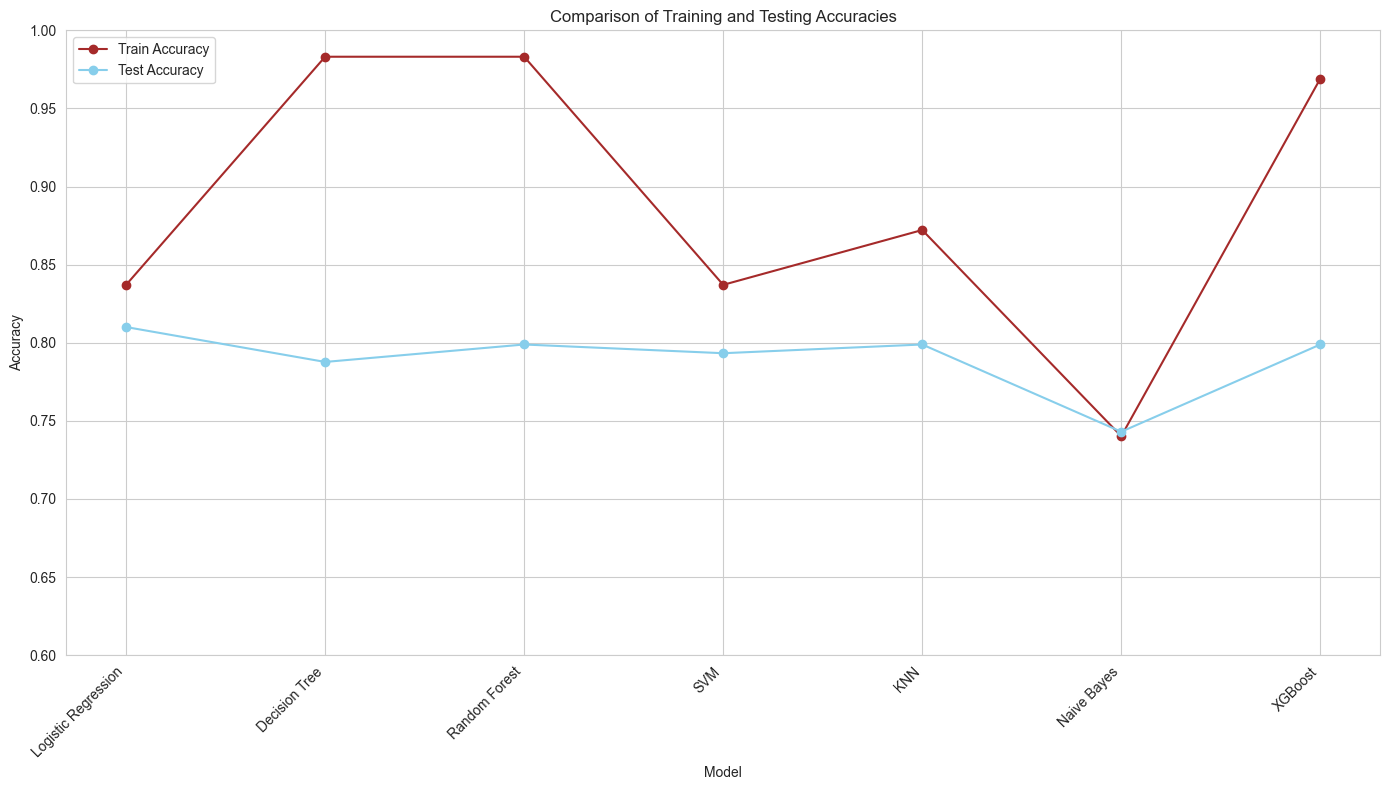

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index')

sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
plt.plot(accuracy_df.index, accuracy_df["Train Accuracy"], marker='o', linestyle='-', color="brown", label="Train Accuracy")
plt.plot(accuracy_df.index, accuracy_df["Test Accuracy"], marker='o', linestyle='-', color="skyblue", label="Test Accuracy")

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Training and Testing Accuracies")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.6, 1.0) 

plt.legend()

plt.tight_layout()
plt.show()

In [79]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))

c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8328769821727569

Generation 2 - Current best internal CV score: 0.8398995370826355

Generation 3 - Current best internal CV score: 0.8399290849995076

Generation 4 - Current best internal CV score: 0.8413375357037328

Generation 5 - Current best internal CV score: 0.8413375357037328

Best pipeline: XGBClassifier(XGBClassifier(input_matrix, learning_rate=1.0, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.15000000000000002, verbosity=0), learning_rate=0.1, max_depth=4, min_child_weight=10, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)
0.8212290502793296


In [80]:
best_pipeline = tpot.fitted_pipeline_

# Predict on test data using the best pipeline
y_pred_test = best_pipeline.predict(X_test)

# Evaluate accuracy and other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics
print("Final Model Evaluation on Test Data:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")

Final Model Evaluation on Test Data:
  Accuracy: 0.8212
  Precision: 0.8088
  Recall: 0.7432
  F1-Score: 0.7746
